<a href="https://colab.research.google.com/github/priyal6/ML/blob/main/sampling_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
X, y = make_classification (
    n_samples = 5000,
    n_features = 10,
    n_classes = 2,
    weights = [0.95, 0.05],
    random_state=42
)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [4]:
def evaluate_model (X_train, y_train, X_test, y_test, desc, results):
  clf = RandomForestClassifier(random_state=42)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  results.append({
        "Method": desc,
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0)
    })
  results = []

In [6]:
 results = []

In [8]:
#Baseline
evaluate_model(X_train, y_train, X_test, y_test, 'Baseline', results)

In [10]:
#Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
evaluate_model(X_ros, y_ros,X_test, y_test, 'Random Oversampling', results)

In [11]:
#random undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
evaluate_model(X_rus, y_rus, X_test, y_test, 'Random Undersampling', results)

In [13]:
#SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
evaluate_model(X_smote, y_smote, X_test, y_test, 'SMOTE', results)

In [14]:
#class wight
clf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
clf_weighted.fit(X_train, y_train)
y_pred_weighted = clf_weighted.predict(X_test)
results.append({
    "Method": "Cost-Sensitive",
    "Precision": precision_score(y_test, y_pred_weighted, zero_division=0),
    "Recall": recall_score(y_test, y_pred_weighted, zero_division=0),
    "F1": f1_score(y_test, y_pred_weighted, zero_division=0)
})

In [19]:
results_df = pd.DataFrame(results)
results.head()

,Method,Precision,Recall,F1
0,Baseline,0.750000,0.521739,0.615385
1,Baseline,0.750000,0.521739,0.615385
2,Random Oversampling,0.688525,0.608696,0.646154
3,Random Undersampling,0.324675,0.724638,0.448430
4,SMOTE,0.544304,0.623188,0.581081


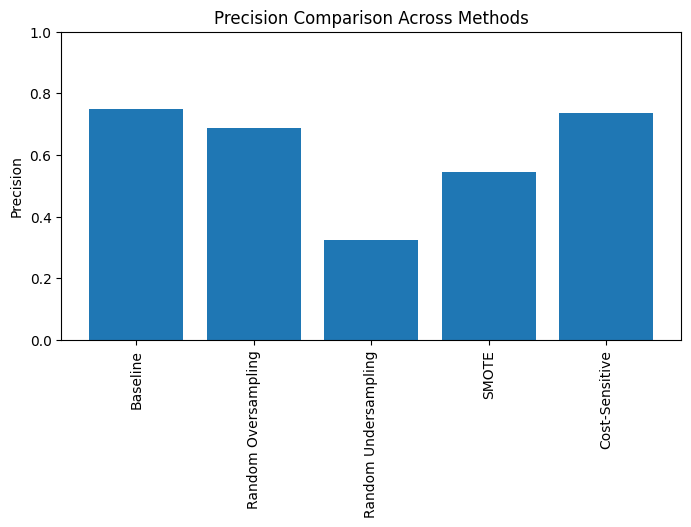

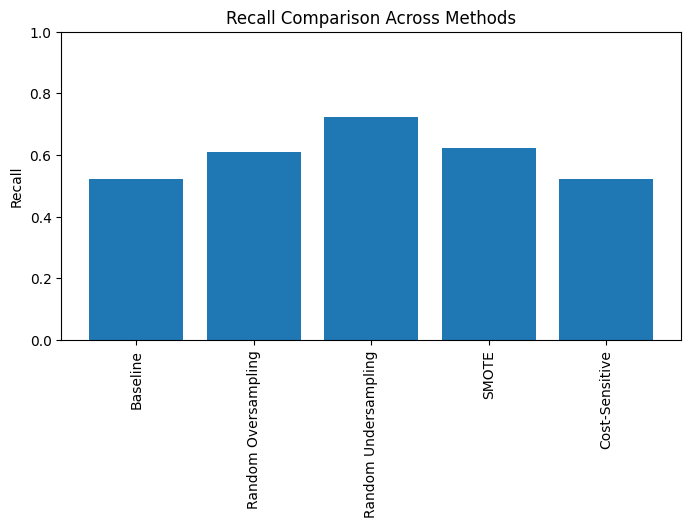

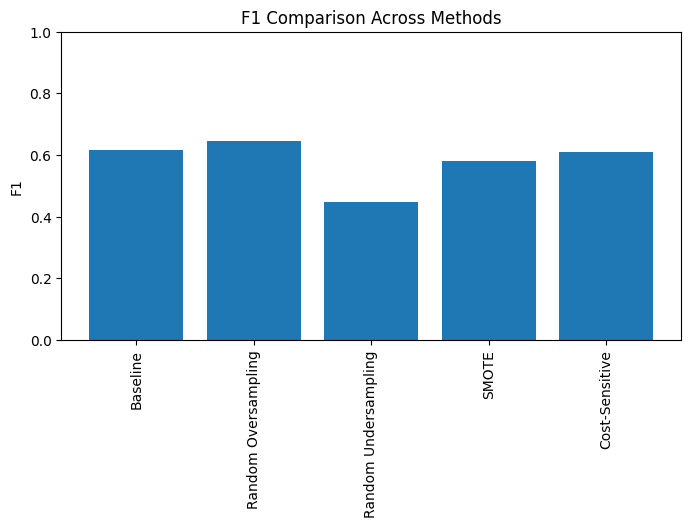

,Method,Precision,Recall,F1
0,Baseline,0.750000,0.521739,0.615385
1,Baseline,0.750000,0.521739,0.615385
2,Random Oversampling,0.688525,0.608696,0.646154
3,Random Undersampling,0.324675,0.724638,0.448430
4,SMOTE,0.544304,0.623188,0.581081
5,Cost-Sensitive,0.734694,0.521739,0.610169


In [24]:
metrics = ["Precision", "Recall", "F1"]
for metric in metrics:
    plt.figure(figsize=(8,4))
    plt.bar(results_df["Method"], results_df[metric])
    plt.title(f"{metric} Comparison Across Methods")
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=90)
    plt.show()

results_df